# Reddit EDA
## Data Source
[Scrapped](https://github.com/interep-project/interep-groups-eda/blob/main/scrapers/src/Reddit.ts) from [Reddit API](https://www.reddit.com/dev/api)

## Data Loading

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, datetime

In [2]:
with open('../data/reddit.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data.values())

## Data Exploration

In [3]:
df.describe()

,awardee_karma,awarder_karma,link_karma,total_karma,created,created_utc,comment_karma,subreddit.user_is_contributor,subreddit.user_is_banned,subreddit.community_icon,subreddit.user_is_muted,subreddit.header_size,subreddit.subscribers,subreddit.user_is_moderator,subreddit.user_is_subscriber
count,1.013000e+03,1013.000000,1.012000e+03,1.013000e+03,1.012000e+03,1.012000e+03,1012.000000,0.0,0.0,0.0,0.0,0.0,1012.0,0.0,0.0
mean,3.212185e+03,231.733465,2.091334e+04,3.919637e+04,1.562837e+09,1.562837e+09,14874.437747,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,7.541773e+04,1443.583836,8.344989e+04,1.339781e+05,9.922702e+07,9.922702e+07,51242.779174,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,0.000000e+00,0.000000,1.000000e+00,-1.300000e+01,1.203470e+09,1.203470e+09,-100.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,0.000000e+00,0.000000,2.015000e+02,7.050000e+02,1.515237e+09,1.515237e+09,169.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,5.100000e+01,0.000000,1.531500e+03,4.275000e+03,1.594419e+09,1.594419e+09,1322.500000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,3.070000e+02,49.000000,7.947250e+03,2.057600e+04,1.640198e+09,1.640198e+09,7722.250000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
max,2.397455e+06,35793.000000,1.386273e+06,2.399455e+06,1.676005e+09,1.676005e+09,747939.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [4]:
df.head()

,is_employee,is_friend,snoovatar_size,awardee_karma,id,verified,is_gold,is_mod,awarder_karma,has_verified_email,...,subreddit.quarantine,subreddit.banner_size,subreddit.user_is_moderator,subreddit.accept_followers,subreddit.public_description,subreddit.link_flair_enabled,subreddit.disable_contributor_requests,subreddit.subreddit_type,subreddit.user_is_subscriber,is_suspended
0,False,False,None,4383,cx877,True,False,True,3163,True,...,False,"[1280, 384]",NaN,True,BIZARRO!,False,False,user,NaN,NaN
1,False,False,"[380, 600]",5695,3ue2x,True,False,True,1269,True,...,False,"[1280, 384]",NaN,True,,False,False,user,NaN,NaN
2,False,False,None,649,45k7t4n8,True,False,False,27,False,...,False,None,NaN,True,,False,False,user,NaN,NaN
3,False,False,"[380, 600]",0,157ivnmo,True,False,True,0,True,...,False,None,NaN,True,,False,False,user,NaN,NaN
4,False,False,None,10,82srj06q,True,False,False,0,True,...,False,None,NaN,False,,False,False,user,NaN,NaN


In [5]:
df.columns

Index(['is_employee', 'is_friend', 'snoovatar_size', 'awardee_karma', 'id',
       'verified', 'is_gold', 'is_mod', 'awarder_karma', 'has_verified_email',
       'icon_img', 'hide_from_robots', 'link_karma', 'is_blocked',
       'total_karma', 'pref_show_snoovatar', 'name', 'created', 'created_utc',
       'snoovatar_img', 'comment_karma', 'accept_followers', 'has_subscribed',
       'subreddit.default_set', 'subreddit.user_is_contributor',
       'subreddit.banner_img', 'subreddit.allowed_media_in_comments',
       'subreddit.user_is_banned', 'subreddit.free_form_reports',
       'subreddit.community_icon', 'subreddit.show_media',
       'subreddit.icon_color', 'subreddit.user_is_muted',
       'subreddit.display_name', 'subreddit.header_img', 'subreddit.title',
       'subreddit.previous_names', 'subreddit.over_18', 'subreddit.icon_size',
       'subreddit.primary_color', 'subreddit.icon_img',
       'subreddit.description', 'subreddit.submit_link_label',
       'subreddit.header_siz

In [6]:
df.dtypes

is_employee                                object
is_friend                                  object
snoovatar_size                             object
awardee_karma                               int64
id                                         object
                                           ...   
subreddit.link_flair_enabled               object
subreddit.disable_contributor_requests     object
subreddit.subreddit_type                   object
subreddit.user_is_subscriber              float64
is_suspended                               object
Length: 65, dtype: object

In [7]:
df = df.convert_dtypes()
columns = ['verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed', 'total_karma', 'created_utc']
df = df[columns]
df.fillna(False, inplace=True)
df.dtypes

verified              boolean
is_employee           boolean
is_gold               boolean
is_mod                boolean
has_verified_email    boolean
is_blocked            boolean
has_subscribed        boolean
total_karma             Int64
created_utc             Int64
dtype: object

## Data Exploration/Vizualization
### Total Karma Distribution

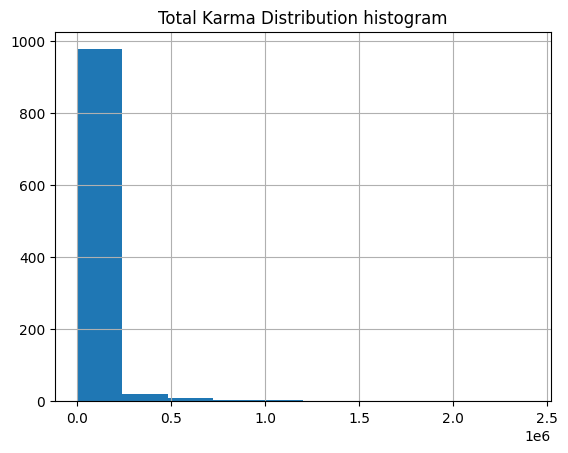

In [8]:
ax = df['total_karma'].hist()
ax.set_title('Total Karma Distribution histogram');

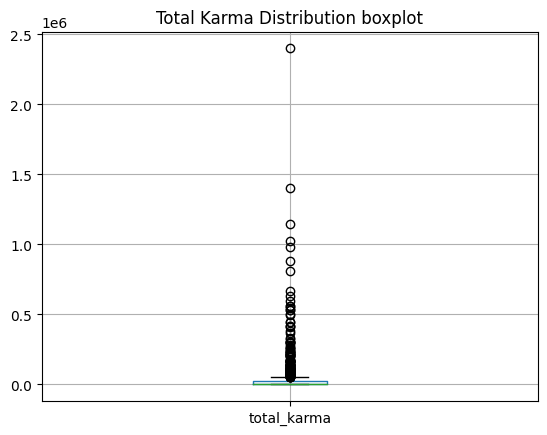

In [9]:
ax = df.boxplot(column=['total_karma'])
ax.set_title('Total Karma Distribution boxplot');

In [10]:
df['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999],interpolation='lower')

0.600       7734
0.900      80801
0.950     173576
0.990     556803
0.999    1143433
Name: total_karma, dtype: Int64

In [11]:
[0] + df['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999], interpolation='lower').tolist()

[0, 7734, 80801, 173576, 556803, 1143433]

In [12]:
count, division = np.histogram(df['total_karma'], bins=[0] + df['total_karma'].quantile([0.6, 0.9, 0.95, 0.99, 0.999], interpolation='lower').tolist())
count

array([605, 303,  51,  40,  10])

## 'verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed', 'total_karma'

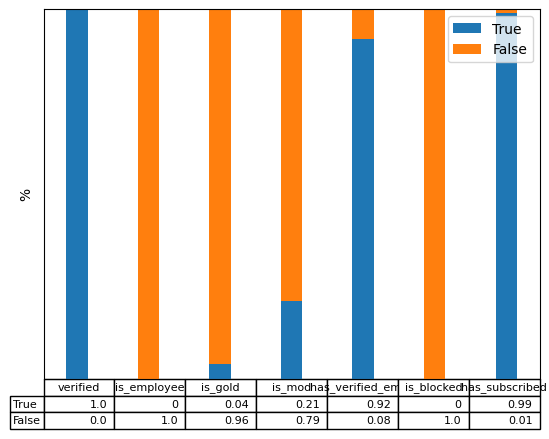

In [13]:
labels = ['verified', 'is_employee', 'is_gold', 'is_mod', 'has_verified_email', 'is_blocked', 'has_subscribed']
[trues, falses] = [[], []]

for col in labels:
    try:
        t = df[col].value_counts(normalize=True)[True]
        trues.append(t)
    except:
        trues.append(0)

    try:
        f = df[col].value_counts(normalize=True)[False]
        falses.append(f)
    except:
        falses.append(0)

[trues, falses] = [[round(t, 2) for t in trues], [round(f, 2) for f in falses]]

width = 0.3
fig, ax = plt.subplots()
ax.bar(labels, trues, width, label='True')
ax.bar(labels, falses, width, bottom=trues, label='False')

ax.set_ylabel('%')
ax.legend()
plt.xticks([])
plt.yticks([])
table = plt.table(cellText=[trues, falses], rowLabels=['True', 'False'], colLabels=labels, loc='bottom')
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

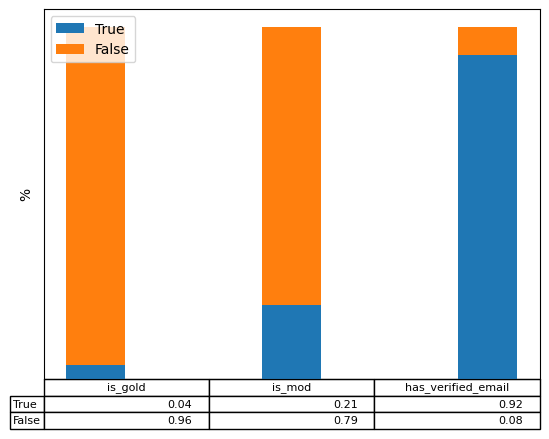

In [14]:
labels = ['is_gold', 'is_mod', 'has_verified_email']
[trues, falses] = [[], []]

for col in labels:
    try:
        t = df[col].value_counts(normalize=True)[True]
        trues.append(t)
    except:
        trues.append(0)

    try:
        f = df[col].value_counts(normalize=True)[False]
        falses.append(f)
    except:
        falses.append(0)

[trues, falses] = [[round(t, 2) for t in trues], [round(f, 2) for f in falses]]

width = 0.3
fig, ax = plt.subplots()
ax.bar(labels, trues, width, label='True')
ax.bar(labels, falses, width, bottom=trues, label='False')

ax.set_ylabel('%')
ax.legend()
plt.xticks([])
plt.yticks([])
table = plt.table(cellText=[trues, falses], rowLabels=['True', 'False'], colLabels=labels, loc='bottom')
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.show()

## Reputation Calculation Simulations

### 1: `total_karma` threshold + `is_gold`, `is_mod`, `has_verified_email`

In [179]:
from tiers import TIERS

def get_followers_bin(x, bins):
    for index, (m, M) in enumerate(bins):
        if m <= x < M:
            return index
    return 4


KARMA_BINS = [(0, 7734), (7734, 80801), (80801, 173576), (173576, 556803), (556803, df['total_karma'].max())]

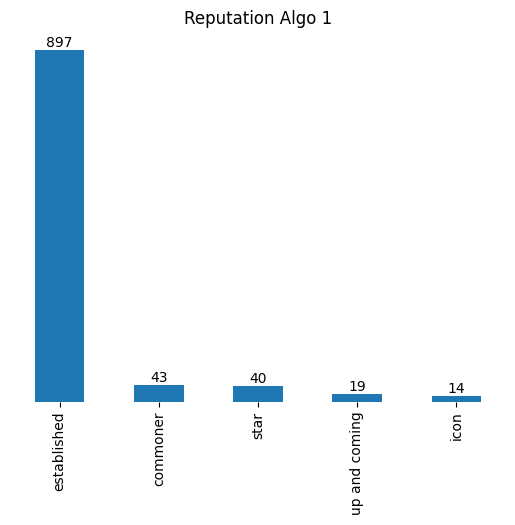

In [180]:
def reputation(total_karma, is_gold, is_mod, has_verified_email):
    followers_bin = get_followers_bin(total_karma, KARMA_BINS)
    return TIERS[max(followers_bin, 2)] if is_gold or is_mod or has_verified_email else TIERS[followers_bin]

df['reputation'] = df.apply(lambda x: reputation(x['total_karma'], x['is_gold'], x['is_mod'], x['has_verified_email'])['name'], axis=1)

# draw bar chart of reputation column
# display the count of each value at the top of each bar
# don't show y-axis
plt = df['reputation'].value_counts().plot.bar(title='Reputation Algo 1')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reddit/reputation_sim1.png', bbox_inches='tight')

Distribution is totally wrong. Sequence should be commoner, up and coming, established, star, icon.

### 2: `total_karma` threshold + `is_gold`, `is_mod`

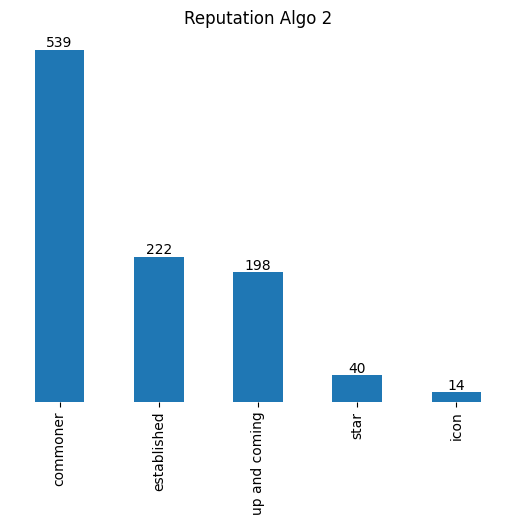

In [181]:
def reputation2(total_karma, is_gold, is_mod):
    followers_bin = get_followers_bin(total_karma, KARMA_BINS)
    return TIERS[max(followers_bin, 2)] if is_gold or is_mod else TIERS[followers_bin]

df['reputation'] = df.apply(lambda x: reputation2(x['total_karma'], x['is_gold'], x['is_mod'])['name'], axis=1)

# draw bar chart of reputation column
# display the count of each value at the top of each bar
# don't show y-axis
plt = df['reputation'].value_counts().plot.bar(title='Reputation Algo 2')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reddit/reputation_sim2.png', bbox_inches='tight')

Sequence is still not correct. There should be more up and coming than established => Not a suitable reputation algorithm.

### 3: `total_karma` threshold + `is_gold`

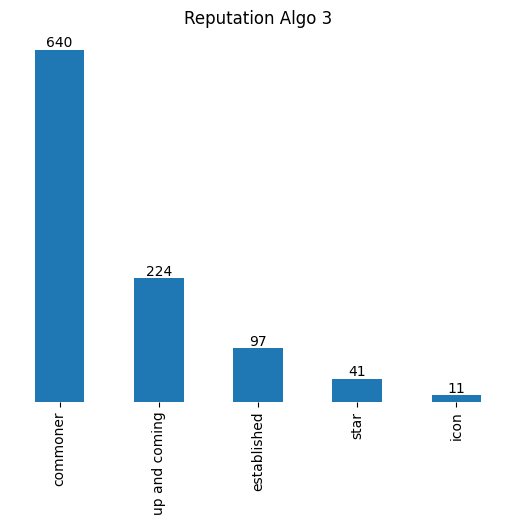

In [187]:
def reputation3(total_karma, is_gold):
    followers_bin = get_followers_bin(total_karma, [(0, 10000), (10000, 50000), (50000, 200000), (200000, 600000), (600000, df['total_karma'].max())])
    return TIERS[max(followers_bin, 1)] if is_gold else TIERS[followers_bin]

df['reputation'] = df.apply(lambda x: reputation3(x['total_karma'], x['is_gold'])['name'], axis=1)

# draw bar chart of reputation column
# display the count of each value at the top of each bar
# don't show y-axis
plt = df['reputation'].value_counts().plot.bar(title='Reputation Algo 3')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reddit/reputation_sim3.png', bbox_inches='tight')

Sequence and distribution looks ok. Could be a suitable reputation algorithm.

### 4: `total_karma` threshold + `is_mod`

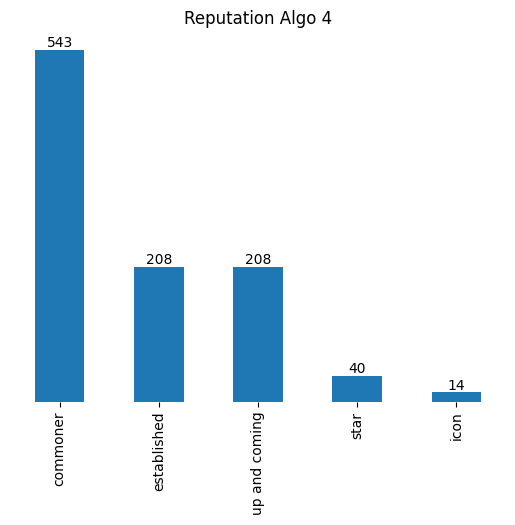

In [19]:
def reputation4(total_karma, is_mod):
    followers_bin = get_followers_bin(total_karma, KARMA_BINS)
    return TIERS[max(followers_bin, 2)] if is_mod else TIERS[followers_bin]

df['reputation'] = df.apply(lambda x: reputation4(x['total_karma'], x['is_mod'])['name'], axis=1)

# draw bar chart of reputation column
# display the count of each value at the top of each bar
# don't show y-axis
plt = df['reputation'].value_counts().plot.bar(title='Reputation Algo 4')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reddit/reputation_sim4.png', bbox_inches='tight')

Sequence is still not correct. There should be more up and coming than established => Not a suitable reputation algorithm.

### 5: Point system

> 2 pt per year account age,
5 pts if gold,
3 pts for moderation,
1 pt for >10k karma
2 pts for >50k karma,
3 pts for >100k karma

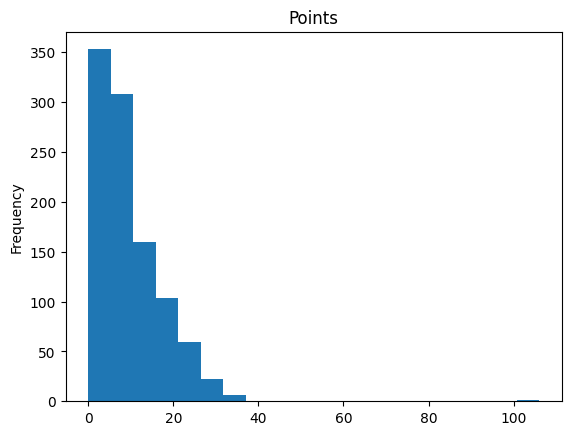

In [198]:
def age_points(timestamp):
    return 2* (datetime.now().year - date.fromtimestamp(timestamp).year)

def karma_points(total_karma):
    if total_karma > 200000:
        return 3
    elif total_karma > 50000:
        return 2
    elif total_karma > 10000:
        return 1
    else:
        return 0

def gold_points(is_gold):
    return 5 if is_gold else 0

def mod_points(is_mod):
    return 3 if is_mod else 0

def points(created_utc, is_gold, is_mod, total_karma):
    return age_points(created_utc) + karma_points(total_karma) + gold_points(is_gold) + mod_points(is_mod)


df['points'] = df.apply(lambda x: points(x['created_utc'], x['is_gold'], x['is_mod'], x['total_karma']), axis=1)

df['points'].plot.hist(title='Points', bins=20);

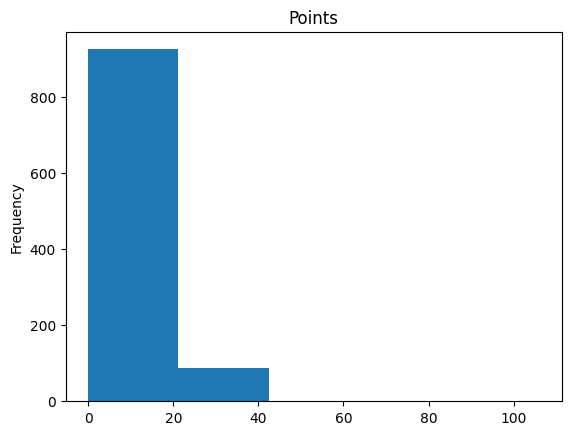

In [199]:
df['points'].plot.hist(title='Points', bins=5);

In [200]:
df['points'].quantile([0.2, 0.6, 0.9, 0.95, 0.99, 0.999], interpolation='lower')

0.200     3
0.600     9
0.900    21
0.950    24
0.990    31
0.999    33
Name: points, dtype: int64

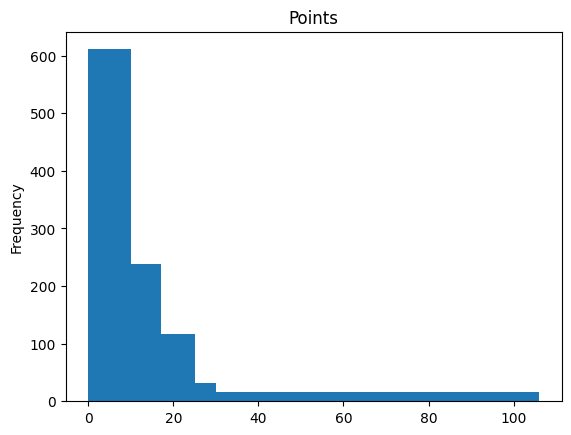

In [201]:
df['points'].plot.hist(title='Points', bins=[0, 10, 17, 25, 30, df['points'].max()]);

In [208]:
import numpy as np
count, division = np.histogram(df['points'], bins=[0, 10, 17, 25, 31, df['points'].max()])
count

array([611, 239, 116,  35,  12])

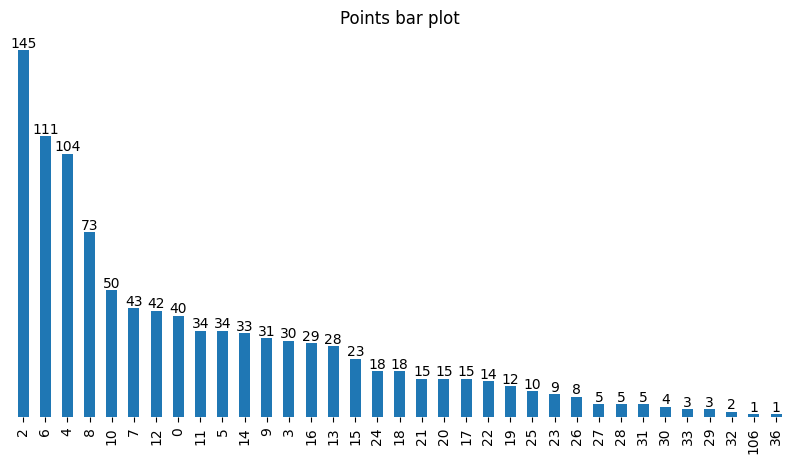

In [209]:
plt = df['points'].value_counts().plot.bar(title='Points bar plot', width=0.5, figsize=(10, 5))
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])

# hide frame
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

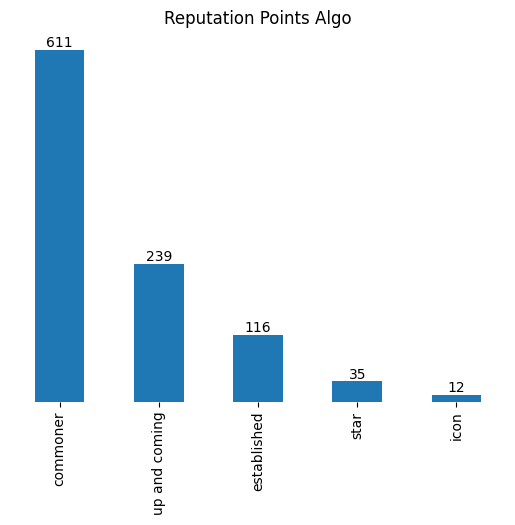

In [211]:
def reputation_points(points):
    if points < 10:
        return TIERS[0]
    elif points < 17:
        return TIERS[1]
    elif points < 25:
        return TIERS[2]
    elif points < 31:
        return TIERS[3]
    else:
        return TIERS[4]

df['reputation'] = df.apply(lambda x: reputation_points(x['points'])['name'], axis=1)

plt = df['reputation'].value_counts().plot.bar(title='Reputation Points Algo')
plt.axes.get_yaxis().set_visible(False)
plt.bar_label(plt.containers[0])
plt.spines['top'].set_visible(False)
plt.spines['right'].set_visible(False)
plt.spines['bottom'].set_visible(False)
plt.spines['left'].set_visible(False)

# save plot
plt.figure.savefig('../plots/reddit/reputation_sim_points.png', bbox_inches='tight')

## Conclusion
- Quantitative treshold: `total_karma`

|  | total\_karma |
| :--- | :--- |
| 0.600 | 7734 |
| 0.900 | 80801 |
| 0.950 | 173576 |
| 0.990 | 556803 |
| 0.999 | 1143433 |

- Boolean thresholds:
  - exclude `verified` and `has_subscribed`, `is_blocked`, `is_employee`
  - use `is_gold`, `is_mod`, `has_verified_email` (clarify signification first)